In [127]:
from collections import Counter
import pandas as pd
import rm as rm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf
from pyrsistent import m
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

import matplotlib
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

import sklearn.tree as tree

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report

In [128]:
math_class_data = pd.read_csv('/Users/chaos/Desktop/student-alcohol-consumption/student-mat.csv')
port_class_data = pd.read_csv('/Users/chaos/Desktop/student-alcohol-consumption/student-por.csv')

In [129]:
math_class_data.shape

(395, 33)

In [130]:
port_class_data.shape

(649, 33)

In [131]:
math_class_data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [132]:
port_class_data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [133]:
math_class_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [134]:
port_class_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [135]:
math_class_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [136]:
port_class_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


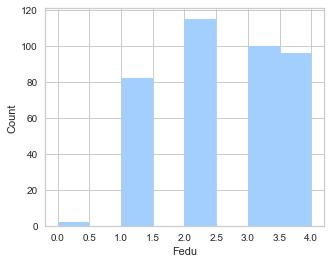

In [137]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.distplot(math_class_data['Fedu'],  
             hist_kws={"alpha": 1, "color": "#a2cffe"}, 
             kde=False, bins=8)
ax = ax.set(ylabel="Count", xlabel="Fedu")

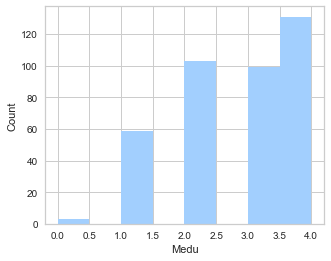

In [138]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.distplot(math_class_data['Medu'],  
             hist_kws={"alpha": 1, "color": "#a2cffe"}, 
             kde=False, bins=8)
ax = ax.set(ylabel="Count", xlabel="Medu")

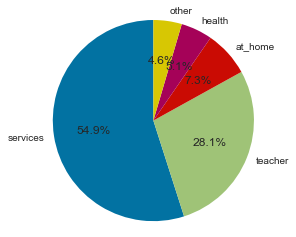

In [139]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(math_class_data['Fjob'].value_counts().tolist(), 
        labels=['services','teacher', 'at_home', 'health','other'], 
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

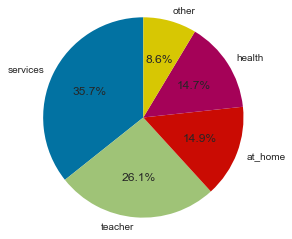

In [140]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(math_class_data['Mjob'].value_counts().tolist(), 
        labels=['services','teacher', 'at_home', 'health','other'], 
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

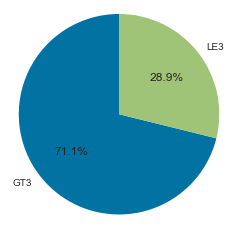

In [141]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(math_class_data['famsize'].value_counts().tolist(), 
        labels=['GT3','LE3'], 
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

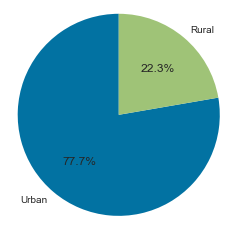

In [142]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(math_class_data['address'].value_counts().tolist(), 
        labels=['Urban','Rural'], 
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

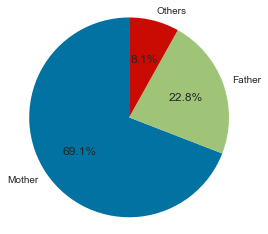

In [143]:
f, ax = plt.subplots(figsize=(4, 4))
plt.pie(math_class_data['guardian'].value_counts().tolist(), 
        labels=['Mother','Father','Others'], 
        autopct='%1.1f%%', startangle=90)
axis = plt.axis('equal')

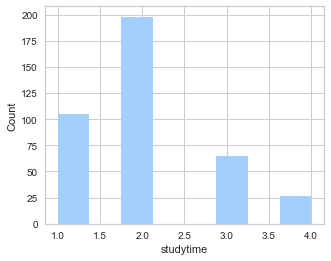

In [144]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.distplot(math_class_data['studytime'],  
             hist_kws={"alpha": 1, "color": "#a2cffe"}, 
             kde=False, bins=8)
ax = ax.set(ylabel="Count", xlabel="studytime")

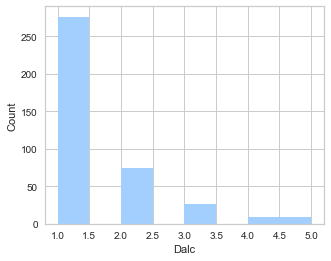

In [145]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.distplot(math_class_data['Dalc'],  
             hist_kws={"alpha": 1, "color": "#a2cffe"}, 
             kde=False, bins=8)
ax = ax.set(ylabel="Count", xlabel="Dalc")

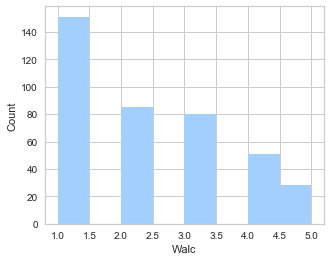

In [146]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.distplot(math_class_data['Walc'],  
             hist_kws={"alpha": 1, "color": "#a2cffe"}, 
             kde=False, bins=8)
ax = ax.set(ylabel="Count", xlabel="Walc")

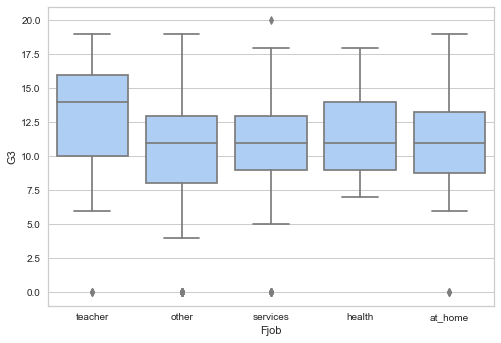

In [147]:
sns.boxplot(x='Fjob',y='G3', data=math_class_data, color='#a2cffe')

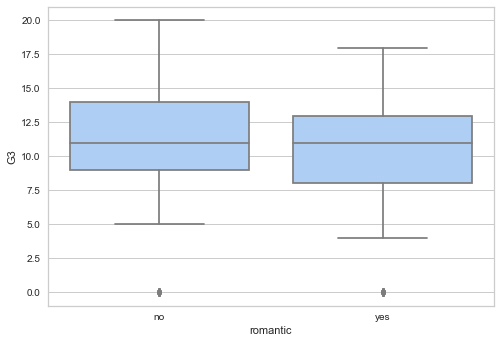

In [148]:
sns.boxplot(x='romantic',y='G3', data=math_class_data, color='#a2cffe')

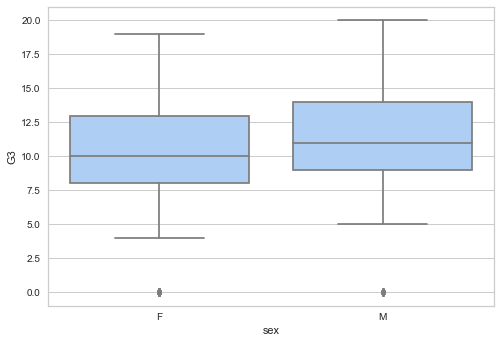

In [149]:
sns.boxplot(x='sex',y='G3', data=math_class_data, color='#a2cffe')

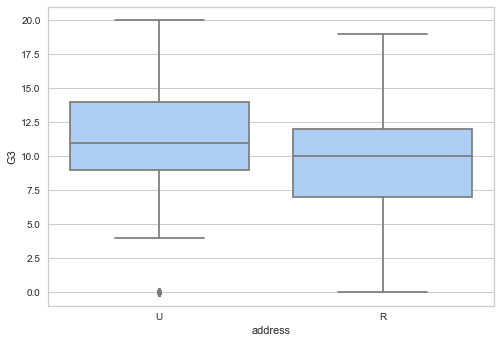

In [150]:
sns.boxplot(x='address',y='G3', data=math_class_data, color='#a2cffe')

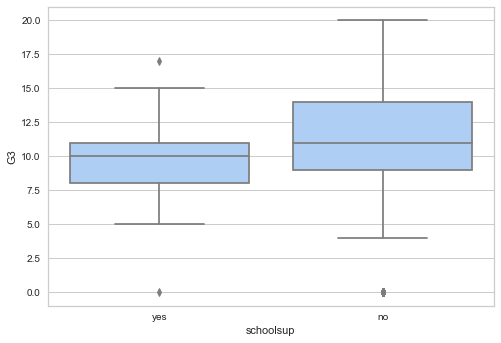

In [151]:
sns.boxplot(x='schoolsup',y='G3', data=math_class_data, color='#a2cffe')

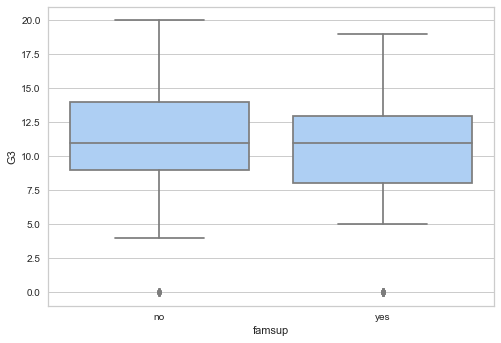

In [152]:
sns.boxplot(x='famsup',y='G3', data=math_class_data, color='#a2cffe')

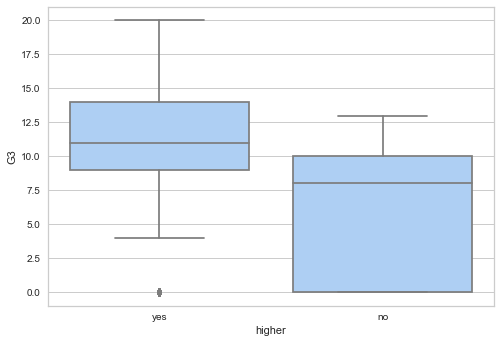

In [153]:
sns.boxplot(x='higher',y='G3', data=math_class_data, color='#a2cffe')

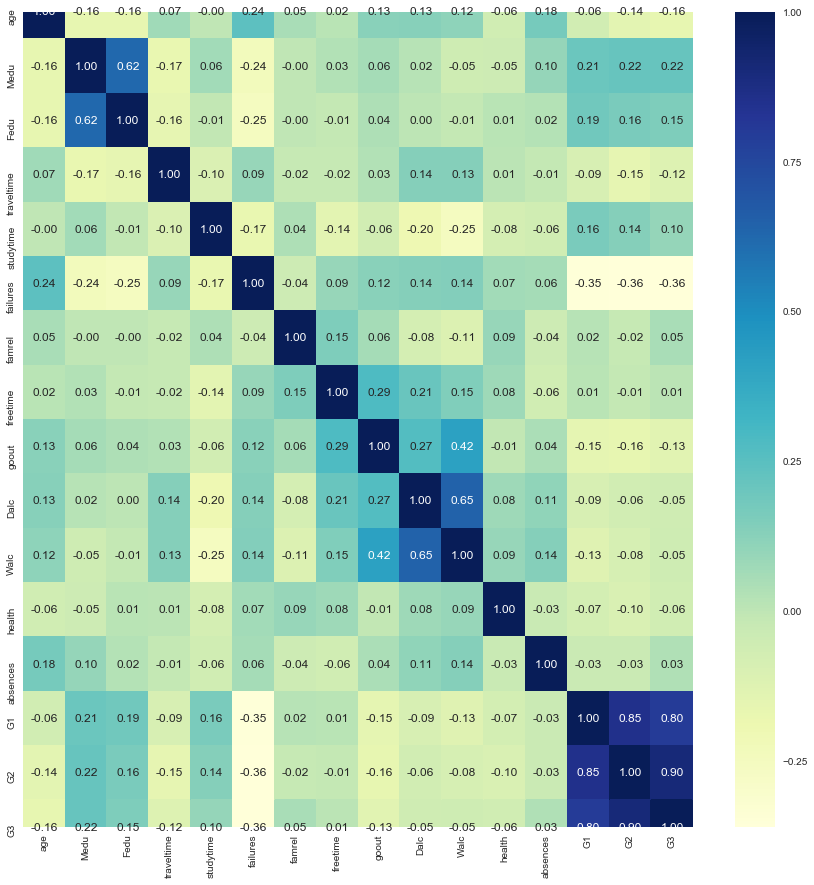

In [154]:
plt.figure(figsize=(15,15))
sns.heatmap(math_class_data.corr(),annot = True,fmt = ".2f",cbar = True,cmap = "YlGnBu")

In [155]:
math_class_data.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [156]:
port_class_data.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [157]:
math_class_data = pd.read_csv('/Users/chaos/Desktop/student-alcohol-consumption/student-mat.csv')
port_class_data = pd.read_csv('/Users/chaos/Desktop/student-alcohol-consumption/student-por.csv')


In [158]:
grades_data = pd.concat([math_class_data,port_class_data])

In [159]:
grades_data.shape

(1044, 33)

In [160]:
grades_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [161]:
grades_data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [162]:
grades_data[math_class_data.isnull() == True].count()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [163]:
grades_data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [164]:
def create_target_column(df):
    G1 = np.asarray(df["G1"].tolist(), dtype = int)
    G2 = np.asarray(df["G2"].tolist(), dtype = int)
    G3 = np.asarray(df["G3"].tolist(), dtype = int)
    G1 = np.divide((G1 + G2 + G3), 3)
    df["G"] = list(G1)
    return df
grades_data = create_target_column(grades_data)
grades_data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.666667


In [165]:
grades_data['final_grade'] = 'na'
grades_data.loc[(grades_data.G >= 10) & (grades_data.G <= 20), 'final_grade'] = 'high' 
grades_data.loc[(grades_data.G >= 0) & (grades_data.G <= 10), 'final_grade'] = 'low' 
grades_data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,G,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,5.666667,low
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,5.333333,low
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,8.333333,low
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,14.666667,high
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,8.666667,low


In [166]:
grades_data.drop(columns=['G1', 'G2' , 'G3','G'])


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,low
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,low
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,low
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,high
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,yes,no,5,4,2,1,2,5,4,high
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,no,4,3,4,1,1,1,4,high
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,no,1,1,1,1,1,5,6,high
647,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,6,low


In [167]:
grades = grades_data.select_dtypes(include=['object']).copy()
grades.head()


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,final_grade
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no,low
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no,low
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no,low
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes,high
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no,low


In [168]:
cleanup_nums = {
    "school":{"GP": 0, "MS": 1}, 
    "sex":{"F": 0, "M": 1},
    "address":{"U": 0, "R": 1},
    "famsize":{"LE3": 0, "GT3": 1},
    "Pstatus":{"T": 0, "A": 1},
    "Mjob":{"teacher": 0, "health": 1,"services": 2,"at_home": 3,"other": 4},
    "Fjob":{"teacher": 0, "health": 1,"services": 2,"at_home": 3,"other": 4},
    "reason":{"home": 0, "reputation": 1,"course":2,"other":3},
    "guardian":{"mother": 0, "father": 1,"other":2},
    "schoolsup":{"yes": 0, "no": 1},
    "famsup":{"yes": 0, "no": 1},
    "paid":{"yes": 0, "no": 1},
    "activities":{"yes": 0, "no": 1},
    "nursery":{"yes": 0, "no": 1},
    "higher":{"yes": 0, "no": 1},
    "internet":{"yes": 0, "no": 1},
    "romantic": {"yes": 0, "no": 1},
    "final_grade":{"high":0, "low":1}}

In [169]:
grades.replace(cleanup_nums, inplace=True)
grades.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,final_grade
0,0,0,0,1,1,3,0,2,0,0,1,1,1,0,0,1,1,1
1,0,0,0,1,0,3,4,2,1,1,0,1,1,1,0,0,1,1
2,0,0,0,0,0,3,4,3,0,0,1,0,1,0,0,0,1,1
3,0,0,0,1,0,1,2,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,4,4,0,1,1,0,0,1,0,0,1,1,1


In [170]:
grades_data.dtypes

school          object
sex             object
age              int64
address         object
famsize         object
Pstatus         object
Medu             int64
Fedu             int64
Mjob            object
Fjob            object
reason          object
guardian        object
traveltime       int64
studytime        int64
failures         int64
schoolsup       object
famsup          object
paid            object
activities      object
nursery         object
higher          object
internet        object
romantic        object
famrel           int64
freetime         int64
goout            int64
Dalc             int64
Walc             int64
health           int64
absences         int64
G1               int64
G2               int64
G3               int64
G              float64
final_grade     object
dtype: object

In [171]:
y = grades_data["G"]
X = grades_data.drop(["G"], axis=1)

X = pd.get_dummies(X)

tree = DecisionTreeRegressor()
tree.fit(X, y)

importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

1. Feature G2 (0.650376)
2. Feature G3 (0.282956)
3. Feature final_grade_low (0.037698)
4. Feature G1 (0.026609)
5. Feature absences (0.000810)
6. Feature health (0.000145)
7. Feature age (0.000123)
8. Feature studytime (0.000107)
9. Feature address_R (0.000107)
10. Feature failures (0.000098)
11. Feature freetime (0.000091)
12. Feature Medu (0.000078)
13. Feature sex_M (0.000069)
14. Feature famrel (0.000068)
15. Feature reason_home (0.000065)
16. Feature Fedu (0.000061)
17. Feature traveltime (0.000053)
18. Feature Dalc (0.000044)
19. Feature reason_other (0.000037)
20. Feature internet_no (0.000036)
21. Feature goout (0.000036)
22. Feature Walc (0.000034)
23. Feature Fjob_services (0.000030)
24. Feature sex_F (0.000027)
25. Feature guardian_father (0.000025)
26. Feature nursery_yes (0.000024)
27. Feature activities_yes (0.000022)
28. Feature reason_reputation (0.000020)
29. Feature guardian_other (0.000018)
30. Feature address_U (0.000016)
31. Feature famsize_LE3 (0.000016)
32. Feat

In [172]:
from scipy.stats import kstest

u = grades_data['G'].mean()
std = grades_data['G'].std()
kstest (grades_data['G'],'norm',(u,std))

KstestResult(statistic=0.04998704817100558, pvalue=0.010469541898450018)

In [173]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'G1', 'G2', 'G3',"G"]
grades_data[columns_to_scale] = standardScaler.fit_transform(grades_data[columns_to_scale])

grades_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,G,final_grade
0,GP,F,1.027889,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,-2.083727,-1.597738,-1.382871,-1.740788,low
1,GP,F,0.221035,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,-2.083727,-1.902291,-1.382871,-1.844396,low
2,GP,F,-1.392674,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,-1.413029,-0.988631,-0.347391,-0.911927,low
3,GP,F,-1.392674,U,GT3,T,4,2,health,services,...,2,1,1,5,2,1.269766,0.838688,0.946958,1.056620,high
4,GP,F,-0.585820,U,GT3,T,3,3,other,other,...,2,1,2,5,4,-1.748378,-0.379525,-0.347391,-0.808319,low


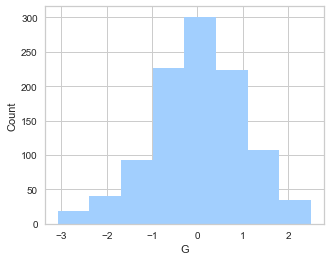

In [174]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.distplot(grades_data['G'],  
             hist_kws={"alpha": 1, "color": "#a2cffe"}, 
             kde=False, bins=8)
ax = ax.set(ylabel="Count", xlabel="G")


In [175]:
dfd = grades_data.drop([ 'G'], axis=1)

In [176]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dfd.final_grade = le.fit_transform(dfd.final_grade)

In [177]:
from sklearn.model_selection import  train_test_split
X = dfd.drop('final_grade',axis=1)
y = dfd.final_grade
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [178]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [179]:
len(list(X_train))

59

In [180]:
from sklearn.tree import DecisionTreeClassifier
msl=[]
for i in range(1,20):
    tree = DecisionTreeClassifier(min_samples_leaf=i)
    t= tree.fit(X_train, y_train)
    ts=t.score(X_test, y_test)
    msl.append(ts)
msl = pd.Series(msl)
msl.where(msl==msl.max()).dropna()

1    0.990431
6    0.990431
8    0.990431
dtype: float64

In [ ]:
dtree = DecisionTreeClassifier(min_samples_leaf=17)
t= dtree.fit(X_train, y_train)
print("Decisioin Tree Model Score" , ":" , t.score(X_train, y_train) , "," , 
      "Cross Validation Score" ,":" , t.score(X_test, y_test))

In [ ]:
res = dtree.predict(X_test)

In [ ]:
report = classification_report(y_test, res)
print(report)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

ne=[]
for i in range(1,58):
    forest = RandomForestClassifier()
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

ne=[]
for i in range(1,58):
    forest = RandomForestClassifier(n_estimators=36, min_samples_leaf=i)
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

In [186]:
forest = RandomForestClassifier(n_estimators=36, min_samples_leaf=2)
f = forest.fit(X_train, y_train)
print("Random Forest Model Score" , ":" , f.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , f.score(X_test, y_test))

Random Forest Model Score : 0.9976047904191617 , Cross Validation Score : 0.9808612440191388


In [187]:
res = f.predict(X_test)

In [188]:
report = classification_report(y_test, res)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       127
           1       0.95      1.00      0.98        82

    accuracy                           0.98       209
   macro avg       0.98      0.98      0.98       209
weighted avg       0.98      0.98      0.98       209



In [189]:
from sklearn.svm import SVC
svc = SVC()
s= svc.fit(X_train, y_train)
print("SVC Model Score" , ":" , s.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , s.score(X_test, y_test))

SVC Model Score : 0.9928143712574851 , Cross Validation Score : 0.9090909090909091


/Users/chaos/PycharmProjects/Interation_3_OSAS/venv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [190]:
res = s.predict(X_test)


In [191]:
report = classification_report(y_test, res)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       127
           1       0.91      0.85      0.88        82

    accuracy                           0.91       209
   macro avg       0.91      0.90      0.90       209
weighted avg       0.91      0.91      0.91       209



In [192]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=3)
af = ada.fit(X_train, y_train)
print("Ada Boost Model Score" , ":" , af.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , af.score(X_test, y_test))

Ada Boost Model Score : 0.9724550898203593 , Cross Validation Score : 0.9856459330143541


In [193]:
res = af.predict(X_test)

In [194]:
report = classification_report(y_test, res)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       127
           1       0.96      1.00      0.98        82

    accuracy                           0.99       209
   macro avg       0.98      0.99      0.99       209
weighted avg       0.99      0.99      0.99       209



In [195]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation = "tanh", solver = "adam", alpha = 0.0001, max_iter = 20000, )
sf = mlp.fit(X_train, y_train)
print("Multi Layer Perceptron Model Score" , ":" , sf.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , sf.score(X_test, y_test))

Multi Layer Perceptron Model Score : 1.0 , Cross Validation Score : 0.9712918660287081


In [196]:
res = mlp.predict(X_test)

In [197]:
report = classification_report(y_test, res)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       127
           1       0.94      0.99      0.96        82

    accuracy                           0.97       209
   macro avg       0.97      0.97      0.97       209
weighted avg       0.97      0.97      0.97       209



In [198]:
grades_data.dtypes

school          object
sex             object
age            float64
address         object
famsize         object
Pstatus         object
Medu             int64
Fedu             int64
Mjob            object
Fjob            object
reason          object
guardian        object
traveltime       int64
studytime        int64
failures         int64
schoolsup       object
famsup          object
paid            object
activities      object
nursery         object
higher          object
internet        object
romantic        object
famrel           int64
freetime         int64
goout            int64
Dalc             int64
Walc             int64
health           int64
absences         int64
G1             float64
G2             float64
G3             float64
G              float64
final_grade     object
dtype: object

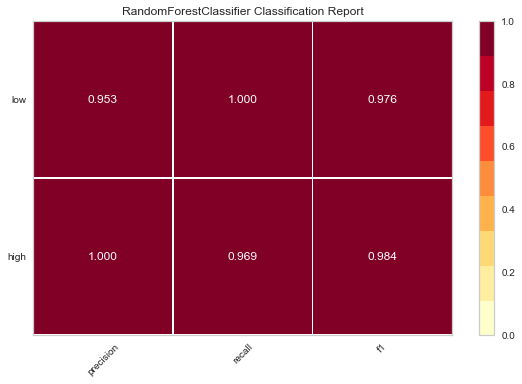

In [199]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(forest, classes=['high','low'])
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In [200]:
from sklearn import tree
from IPython.display import Image
import pydotplus 


def visualize_tree(tr, feature_names):
    
    with open("dt.dot", 'w') as f:
        tree.export_graphviz(tr, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    
visualize_tree(dtree.fit(X_train, y_train), X.loc[:,'school':'final_grade'].columns)

dot_data = tree.export_graphviz(dtree.fit(X_train, y_train))
graph = pydotplus.graphviz.graph_from_dot_file("dt.dot")
graph.write_pdf("dt.pdf")
Image(graph.create_png())

KeyError: 'final_grade'